###**Video:**

[Video de Explicación- Proyecto 1 - Regresión Lineal](https://youtu.be/E5s8knscAcI)

#Datos del Estudiante

**Estudiante:** Cristino Pérez Ramos


**Carné:** 23003993

# Introducción


En este proyecto  se pretende utilizar el algoritmo de descenso por gradiente para entrenar un algoritmo regresión lineal  y ajustarlo a un set de datos.  Este modelo será constrastado con el modelo de regresión lineal de Scikit Learn.

#Importando librerias necesarias#

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Cargando los Datos  y Renombrando Columnas#

Cargando los datos a un array con Numpy

In [29]:
data_array = np.load("/content/proyecto_training_data.npy")


Cargando los datos a un DataFrame con Pandas para mayor facilidad en la manipulación de datos.

In [30]:
data= pd.DataFrame(data_array)
data.head()


,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Renombrando las columnas para mejor entendimiento de los tados:

In [31]:
data.columns = ["Sale Price","Overall-Quality", "1stFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"]
data.head()


,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


#Dividiendo los datos de entrenamiento y de testing

El set es dividido en 2 partes. El data_train representa los datos a entrenar y el data_test representa los datos para validar nuestro algoritmo.

In [32]:
n=len(data)   #Número de registros en el dataSet
data['Train'] = np.random.uniform(0,1,n) <=0.8 #Create a column to assign a number randomly to 80% of data.
data_train, data_test=data[data['Train'] ==True], data[data['Train'] ==False]   #dividiendo el dataSet.
print(f"Registros de entrenamiento: {len(data_train)} \nRegistros para Testeo: {len(data_test)} \n")
del data['Train']
del data_train['Train']
del data_test['Train']



Registros de entrenamiento: 1163 
Registros para Testeo: 297 



#Análisis Exploratorio de Datos

Los números para describir los datos son presentados en una tabla usando pandas. 

In [33]:
data_train.head()

,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Estadisticos de cada columna:

In [34]:
AED = {"Media":data_train.mean(), "Valor Máximo": data_train.max(), "Valor Minimo": data_train.min(), "Rango": data_train.max()-data_train.min(), "Desviación Standar": data_train.std()}
pd.DataFrame(AED)

,Media,Valor Máximo,Valor Minimo,Rango,Desviación Standar
Sale Price,181527.724850,755000.0,34900.0,720100.0,81147.820382
Overall-Quality,6.105761,10.0,1.0,9.0,1.392750
1stFlrSF,1162.433362,4692.0,334.0,4358.0,389.280712
TotRmsAbvGrd,6.534824,14.0,2.0,12.0,1.633697
YearBuilt,1970.997420,2010.0,1872.0,138.0,30.650225
LotFrontage,69.938478,313.0,21.0,292.0,24.805914


#Histogramas de Cada Variable#

Acá se presentan todos los histogramas de cada variable.

In [35]:
data.columns

Index(['Sale Price', 'Overall-Quality', '1stFlrSF', 'TotRmsAbvGrd',
       'YearBuilt', 'LotFrontage'],
      dtype='object')

SALE PRICE


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


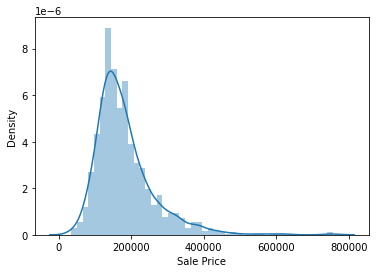

---------------------
OVERALL-QUALITY


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


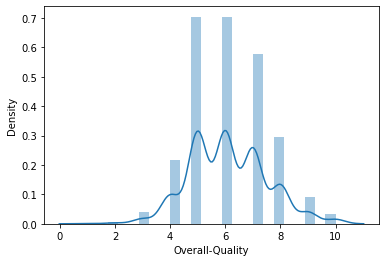

---------------------
1STFLRSF


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


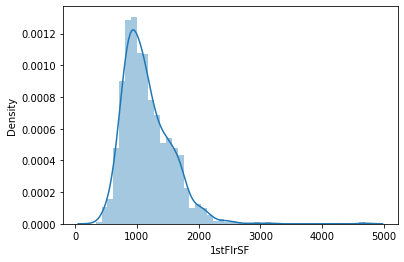

---------------------
TOTRMSABVGRD


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


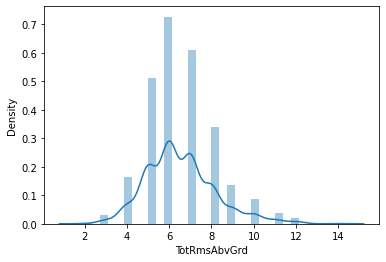

---------------------
YEARBUILT


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


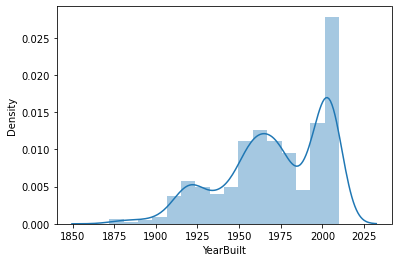

---------------------
LOTFRONTAGE


<ipython-input-36-a1f1e6b76cec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[colname])


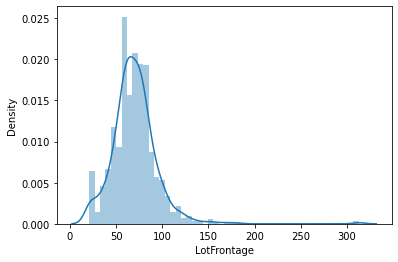

---------------------


In [36]:
   for colname in data_train.columns:
        print(colname.upper())
        sns.distplot(data_train[colname])
        plt.show()
        print("---------------------")

#Coeficientes de Correlación y ScatterPlots

**-Coeficientes de Correlación entre variables**

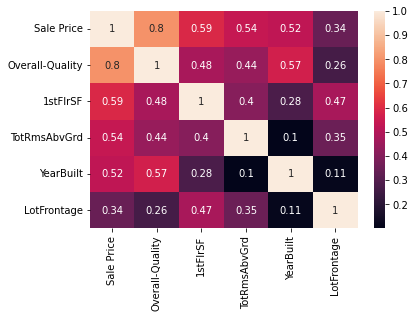

In [37]:
sns.heatmap(data_train.corr(),annot=True)
plt.show()

**-Gráficas con MatplotLib**

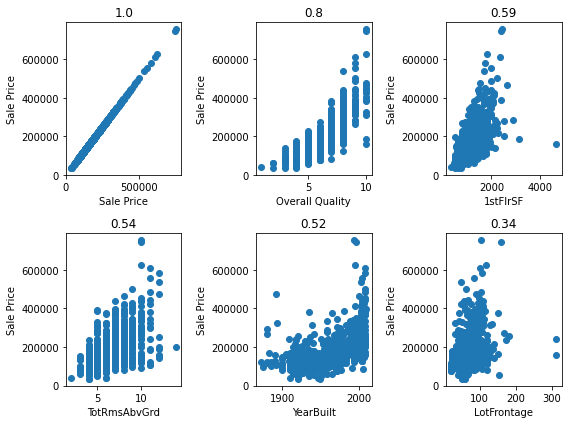

In [38]:
fig, axes =plt.subplots(2,3)
y=data_train['Sale Price']

#Tamaño
fig.set_figheight(6)
fig.set_figwidth(8)

#Graficas
axes[0,0].scatter(y,y)
axes[0,1].scatter(data_train['Overall-Quality'],y)
axes[0,2].scatter(data_train["1stFlrSF"],y)
axes[1,0].scatter(data_train['TotRmsAbvGrd'],y)
axes[1,1].scatter(data_train['YearBuilt'],y)
axes[1,2].scatter(data_train['LotFrontage'],y)

#Correlaciones
axes[0,0].set_title(round(y.corr(y),2))
axes[0,1].set_title(round(y.corr(data_train['Overall-Quality']),2))
axes[0,2].set_title(round(y.corr(data_train["1stFlrSF"]),2))
axes[1,0].set_title(round(y.corr(data_train['TotRmsAbvGrd']),2))
axes[1,1].set_title(round(y.corr(data_train['YearBuilt']),2))
axes[1,2].set_title(round(y.corr(data_train['LotFrontage']),2))

#Etiquetas en Y
for i in range(2):
  for j in range(3):
    axes[i,j].set_ylabel("Sale Price")


#Etiquetas en X
axes[0,0].set_xlabel("Sale Price")
axes[0,1].set_xlabel("Overall Quality")
axes[0,2].set_xlabel("1stFlrSF")
axes[1,0].set_xlabel('TotRmsAbvGrd')
axes[1,1].set_xlabel('YearBuilt')
axes[1,2].set_xlabel('LotFrontage')

fig.tight_layout()
plt.show()

En la gráfica anterior se puede observar que existe mayor correlación para el precio de ventas por parte de las variables **Overall Quality y  First Floor square feet (1stFlrSF:)**  Por lo que se tomarán estas dos variables para nuestros modelos de entrenamiento.

#Clase MyRegresionModel con Descenso de Gradiente + *Visualización*

Acá entrenaremos nuestro modelo manual

In [39]:
class MyRegresionModel:
    def __init__(self, alpha=0.01, epochs=100):
        self.alpha = alpha
        self.epochs = epochs

    def descenso_gradientes(self, x, y):  #Función del descenso de gradiente
        self.x=x
        self.y=y
        #Preparar los datos en vector form
        
        vect1 = np.ones_like(x).reshape(-1, 1)
        x = np.reshape(x, (-1, 1))
        x = np.hstack([x, vect1]) #Agregar columna de 1's a x.
        
        # Parámetros de Entrenamiento
        
        n = len(y)
        
        
        self.beta = np.zeros((x.shape[1], 1))
        self.error = np.zeros((self.epochs, 1))
        self.betas = np.zeros((self.epochs,2))
        # Comenzar entrenamiento
        for i in range(self.epochs):
            y_pred = np.matmul(x, self.beta)
            self.error[i] = (1/(2*n)) * np.sum(np.square(y-y_pred))
            gradiente_error = (1/n) * x.T.dot(y_pred-y)
            self.beta = self.beta - self.alpha * gradiente_error

            b0 = self.beta[0].mean()
            b1 = self.beta[1].mean()

            self.betas[i] = np.array([b0,b1])




        return self.betas, self.error    #Retornar los arrays beta y el errror de cada iteración

    def fit(self, x,y):
      self.modelo, self.error = self.descenso_gradientes( x, y)
      modelo_final = self.modelo[self.epochs-1]

      return self.modelo


    def visualizar_error(self):
        
        plt.plot(range(len(self.error)), self.error)
        plt.title("Error en el tiempo")
        plt.xlabel("# Iteración")
        plt.ylabel("Error")
        plt.show()

    def visualizar_modelo(self,n):
      k = np.arange(0,self.epochs,n)
      print(k)
      for i in k:
         
         b0,b1 = self.modelo[i]

         print("Modelo de Regresión-- > Iteración ", i+1)
         print(f"b0: {b0}")
         print(f"b1: {b1}")
         

         y_model = b0+self.x*b1

 
         my_model_data =  np.hstack([self.x.T, y_model.T])
         y_original =np.array([self.y]) 
         o_data = np.hstack([self.x.T,y_original .T])

       

         #Paso todo a pandas para graficar con seaborn

         midata=pd.DataFrame(my_model_data,columns= ["x","y"])
         original_data= pd.DataFrame(o_data,columns= ["x","y"])

         sns.lmplot(x="x",y="y",data=midata)
         sns.lmplot(x="x",y="y",data=original_data)

         print("--------------------------------")

         plt.title("Modelo de Regresión")
         plt.xlabel("x")
         plt.ylabel("Sales Price")
         plt.show()
         


##Entrenando el Modelo Lineal - Forma Manual

###Sales Price vs Overall Quality Linear Model

Primero, obtendremos las variables del DataFrame que usaremos para la variable **Overral-Quality**

In [40]:
y_train_sales=np.array(data_train['Sale Price'])
x_train_overrall_quality= np.array([data_train['Overall-Quality']])

Definimos nuestra instancia del modelo:

In [41]:
reg1 = MyRegresionModel(alpha=0.01, epochs=40) 


Entrenamos el modelo y obtenemos nuestros resultados finales:

In [42]:
modelo = reg1.fit(x_train_overrall_quality,y_train_sales)
betas_finales_manual1 = pd.DataFrame(modelo, columns =["bo", "b1"])
betas_finales_manual1.tail(2)   #Las últimas dos iteraciones nos dan la respuesta final para nuestro modelo.

,bo,b1
38,27109.868975,7610.379136
39,27096.789337,7694.288796


Visualizamos el error en el tiempo:

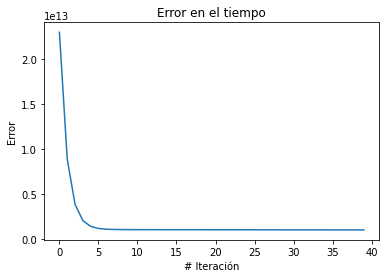

In [43]:
reg1.visualizar_error()

**Gráficamos nuestro modelo**

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
Modelo de Regresión-- > Iteración  1
b0: 11083.648960932862
b1: 1815.2772484952711
--------------------------------


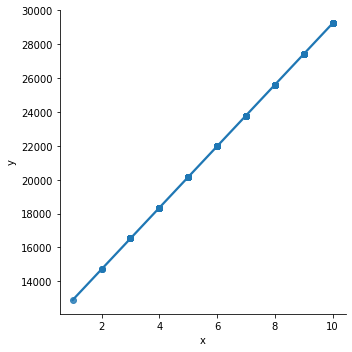

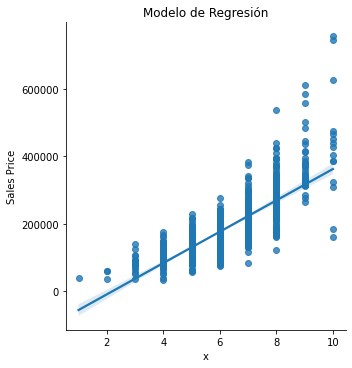

Modelo de Regresión-- > Iteración  3
b0: 21668.60184291705
b1: 3640.2734841214683
--------------------------------


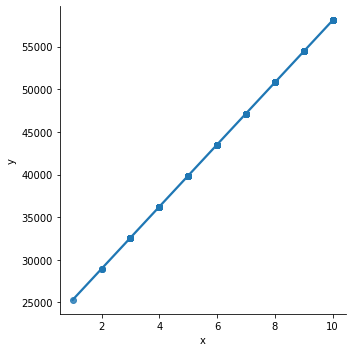

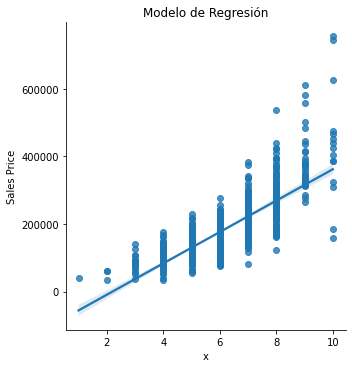

Modelo de Regresión-- > Iteración  5
b0: 25440.526366373047
b1: 4403.10037083059
--------------------------------


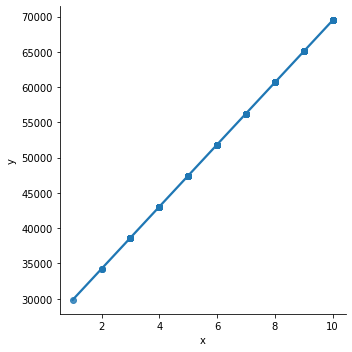

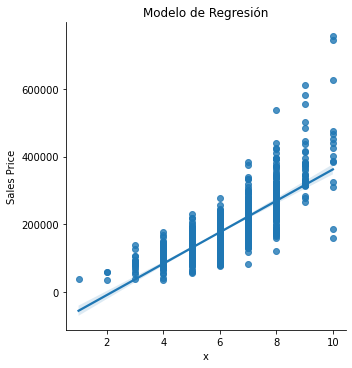

Modelo de Regresión-- > Iteración  7
b0: 26773.66858338785
b1: 4785.606320170223
--------------------------------


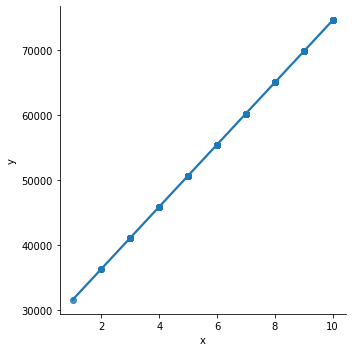

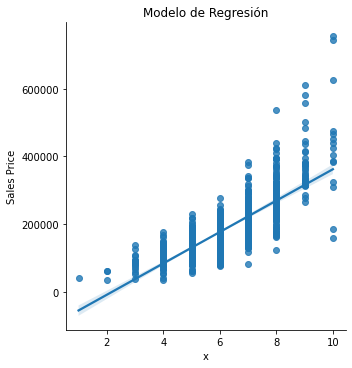

Modelo de Regresión-- > Iteración  9
b0: 27233.838184712877
b1: 5031.866606945037
--------------------------------


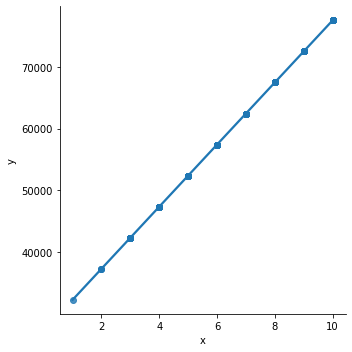

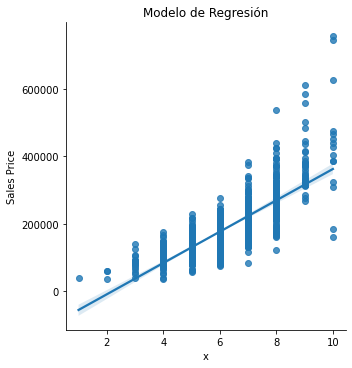

Modelo de Regresión-- > Iteración  11
b0: 27381.53403435607
b1: 5229.25077448329
--------------------------------


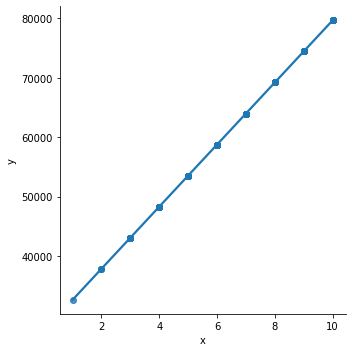

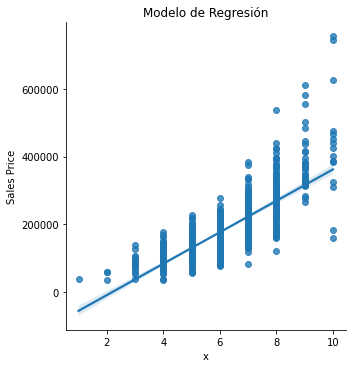

Modelo de Regresión-- > Iteración  13
b0: 27417.39287794026
b1: 5409.033817946434
--------------------------------


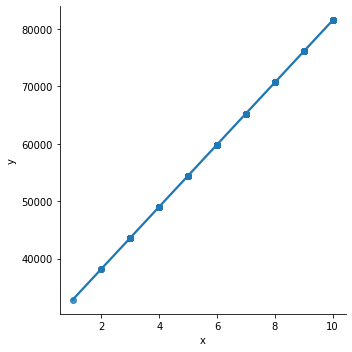

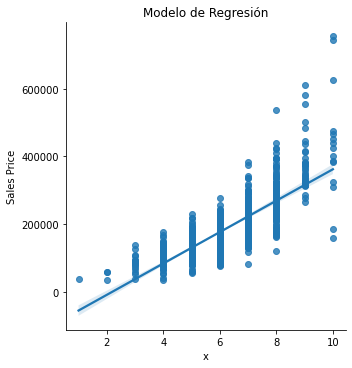

Modelo de Regresión-- > Iteración  15
b0: 27413.23483960786
b1: 5582.411069076702
--------------------------------


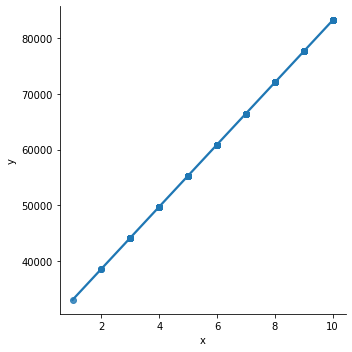

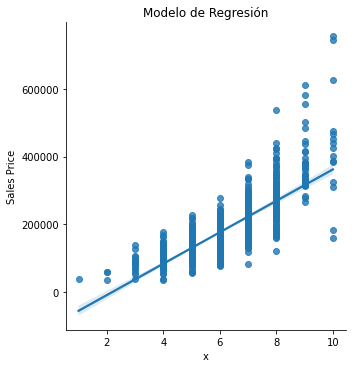

Modelo de Regresión-- > Iteración  17
b0: 27394.768710525892
b1: 5753.3901221313845
--------------------------------


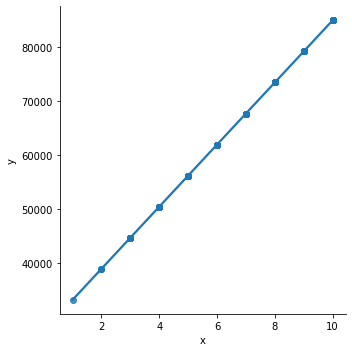

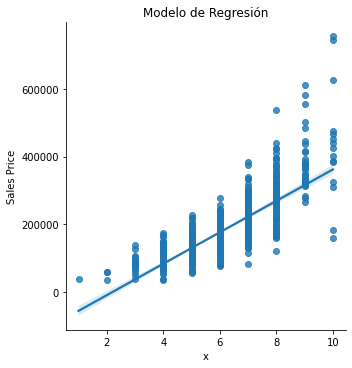

Modelo de Regresión-- > Iteración  19
b0: 27371.19722074074
b1: 5923.405641217692
--------------------------------


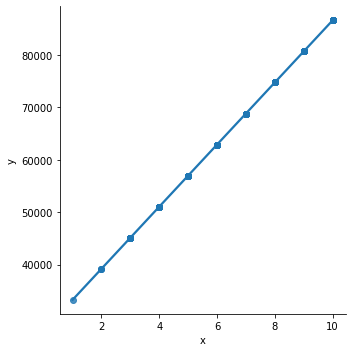

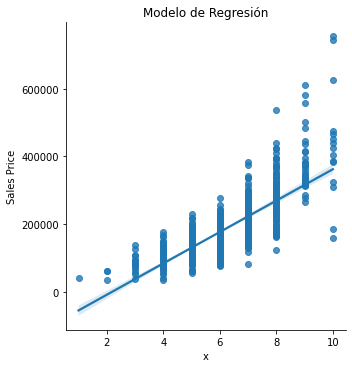

Modelo de Regresión-- > Iteración  21
b0: 27345.814573355743
b1: 6092.971281568691
--------------------------------


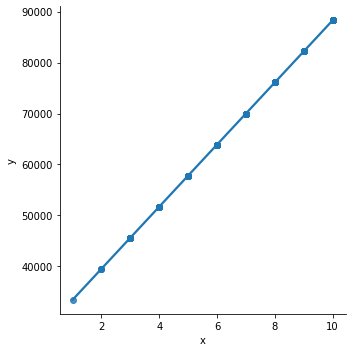

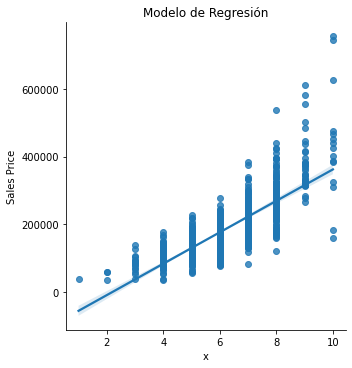

Modelo de Regresión-- > Iteración  23
b0: 27319.799948985175
b1: 6262.271013016664
--------------------------------


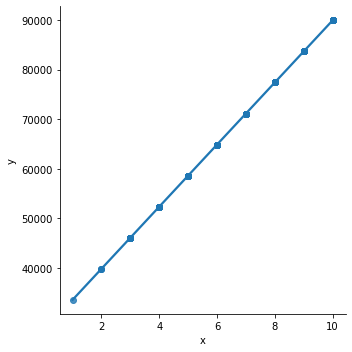

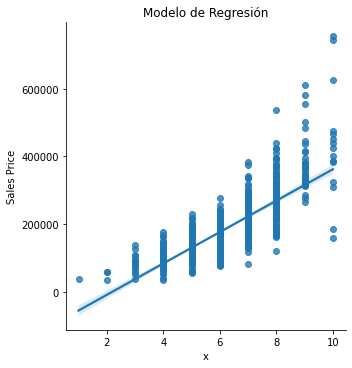

Modelo de Regresión-- > Iteración  25
b0: 27293.575432589103
b1: 6431.370790764212
--------------------------------


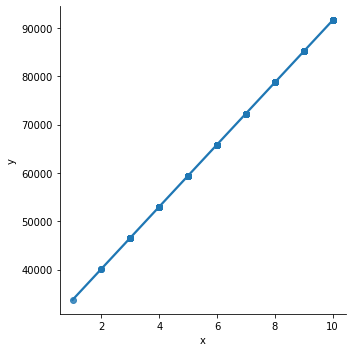

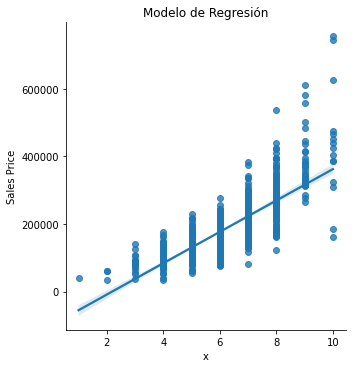

Modelo de Regresión-- > Iteración  27
b0: 27267.292098388032
b1: 6600.29432527566
--------------------------------


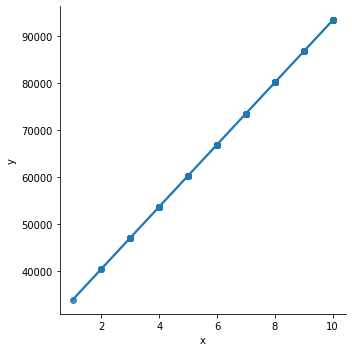

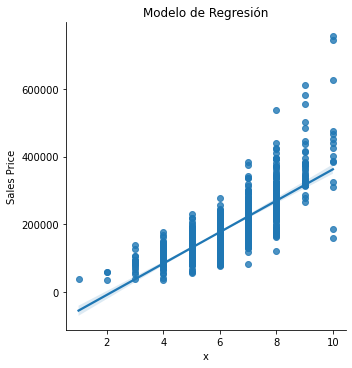

Modelo de Regresión-- > Iteración  29
b0: 27241.004009328935
b1: 6769.050204946993
--------------------------------


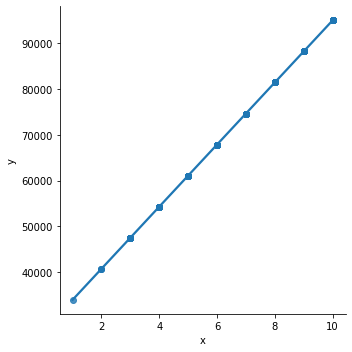

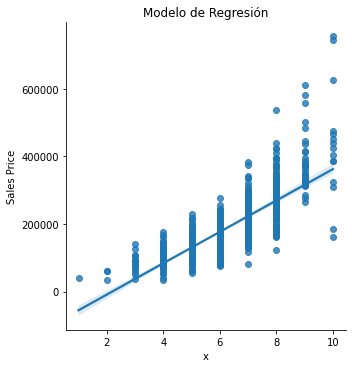

Modelo de Regresión-- > Iteración  31
b0: 27214.73050211673
b1: 6937.641604965333
--------------------------------


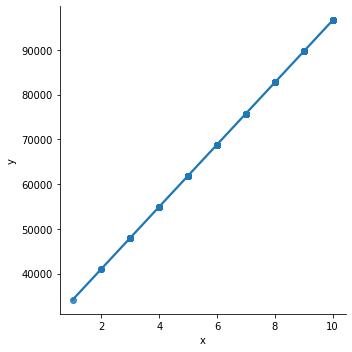

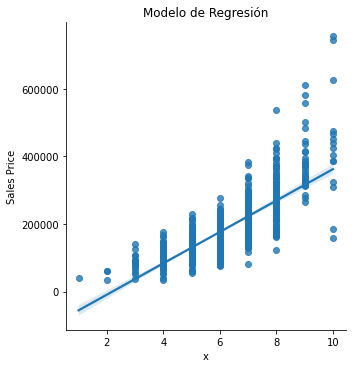

Modelo de Regresión-- > Iteración  33
b0: 27188.47848282944
b1: 7106.069762702562
--------------------------------


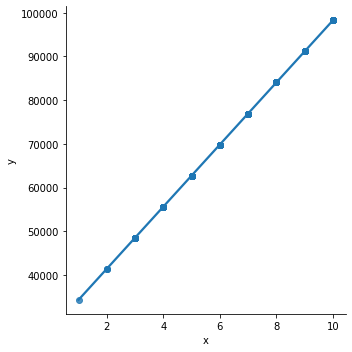

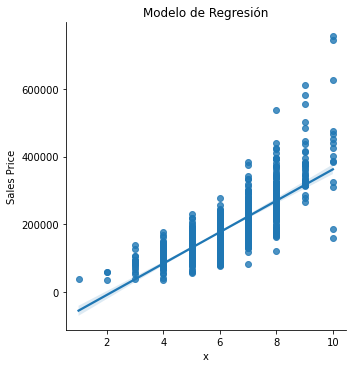

Modelo de Regresión-- > Iteración  35
b0: 27162.25040788001
b1: 7274.335221770968
--------------------------------


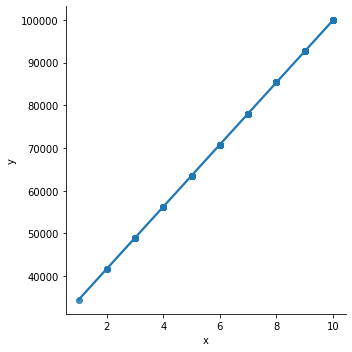

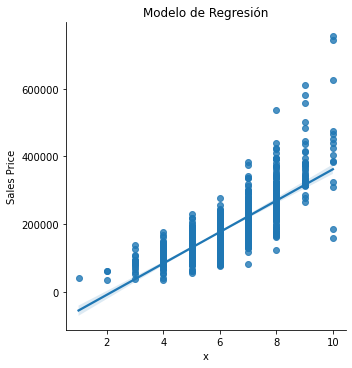

Modelo de Regresión-- > Iteración  37
b0: 27136.047140889732
b1: 7442.438277346799
--------------------------------


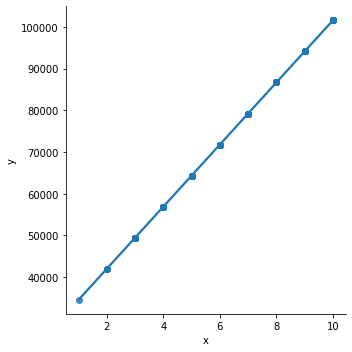

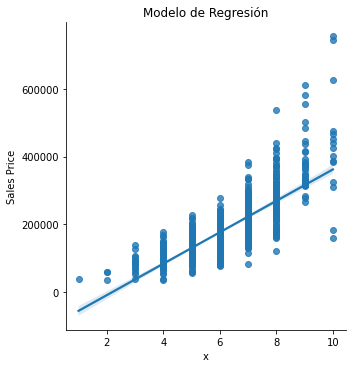

Modelo de Regresión-- > Iteración  39
b0: 27109.86897533767
b1: 7610.3791355788335
--------------------------------


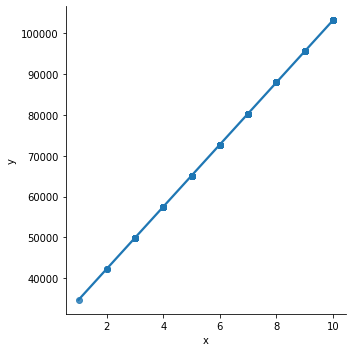

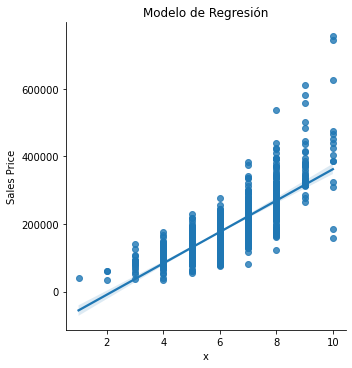

In [44]:
reg1.visualizar_modelo(n=2)

###Sales Price vs First Floor square feet (1stFlrSF) linear Model

Especificamos los datos para el entrenamiento de este modelo:

In [45]:
y_train_sales=np.array(data_train['Sale Price'])
x_train_1stFlrSF= np.array([data_train['1stFlrSF']])

Declaramos la instancia para nuestro modelo:

In [46]:
reg2 = MyRegresionModel(alpha=0.01, epochs=40)  #Definimos nuestra instancia del modelo.

Entrenamos el modelo

In [47]:
modelo2 = reg2.fit(x_train_overrall_quality,y_train_sales)
betas_finales_manual2 = pd.DataFrame(modelo2, columns =["bo", "b1"])
betas_finales_manual2.tail(2)   #Las últimas dos interaciones nos dan la respuesta final para nuestro modelo.

,bo,b1
38,27109.868975,7610.379136
39,27096.789337,7694.288796


Visualización del error en cada iteración

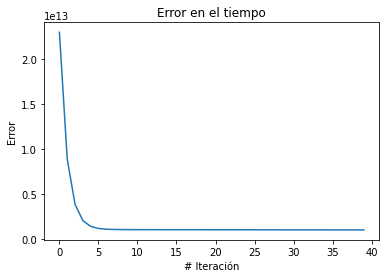

In [48]:
reg2.visualizar_error()

Visualizamos nuestros modelo:

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
Modelo de Regresión-- > Iteración  1
b0: 11083.648960932862
b1: 1815.2772484952711
--------------------------------


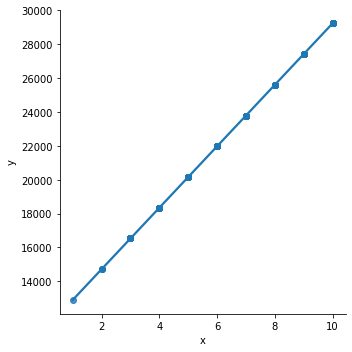

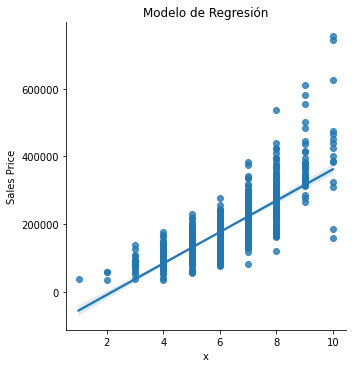

Modelo de Regresión-- > Iteración  3
b0: 21668.60184291705
b1: 3640.2734841214683
--------------------------------


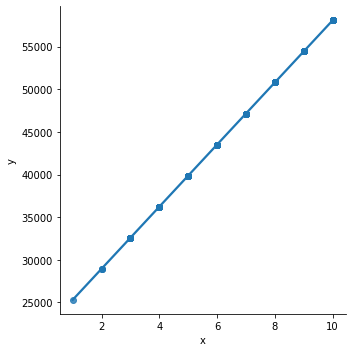

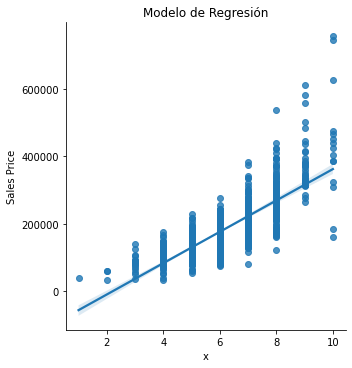

Modelo de Regresión-- > Iteración  5
b0: 25440.526366373047
b1: 4403.10037083059
--------------------------------


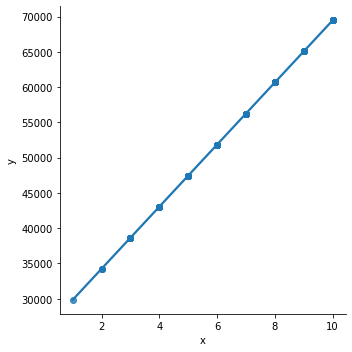

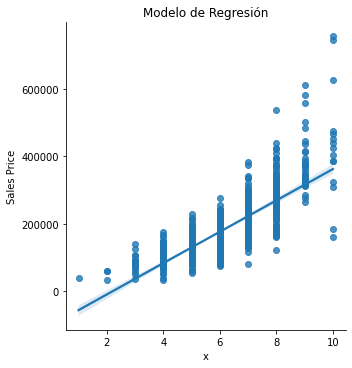

Modelo de Regresión-- > Iteración  7
b0: 26773.66858338785
b1: 4785.606320170223
--------------------------------


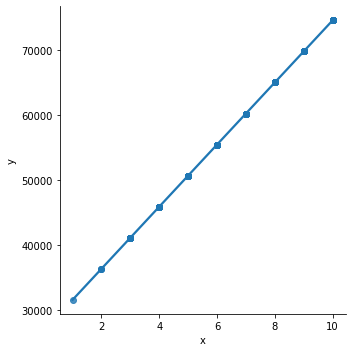

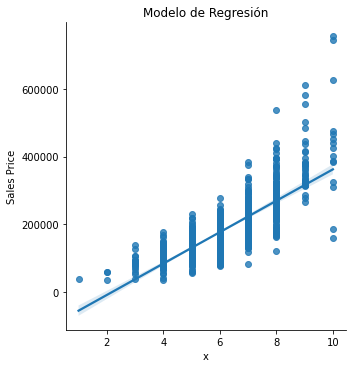

Modelo de Regresión-- > Iteración  9
b0: 27233.838184712877
b1: 5031.866606945037
--------------------------------


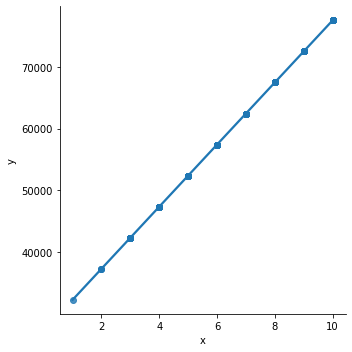

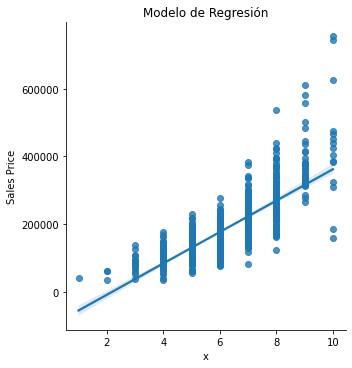

Modelo de Regresión-- > Iteración  11
b0: 27381.53403435607
b1: 5229.25077448329
--------------------------------


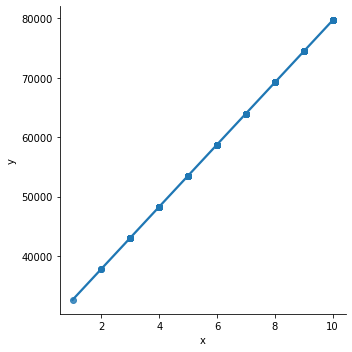

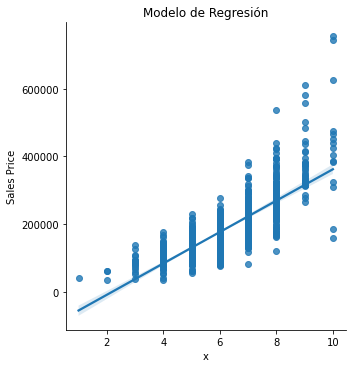

Modelo de Regresión-- > Iteración  13
b0: 27417.39287794026
b1: 5409.033817946434
--------------------------------


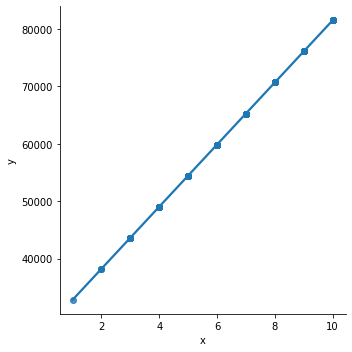

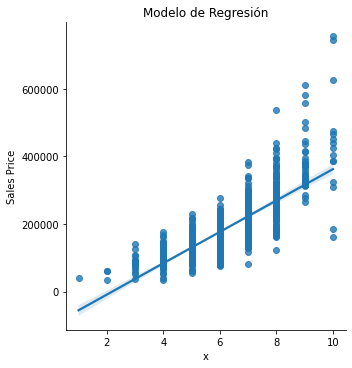

Modelo de Regresión-- > Iteración  15
b0: 27413.23483960786
b1: 5582.411069076702
--------------------------------


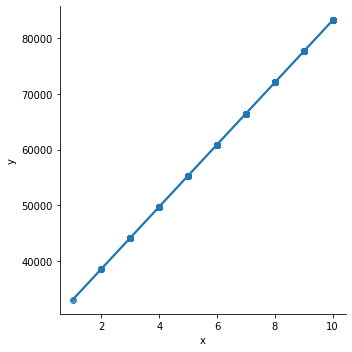

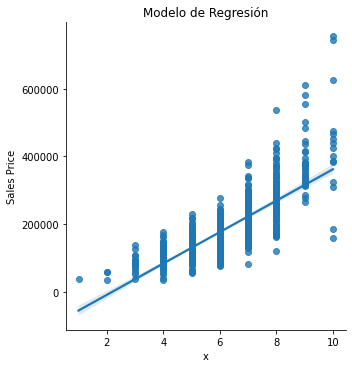

Modelo de Regresión-- > Iteración  17
b0: 27394.768710525892
b1: 5753.3901221313845
--------------------------------


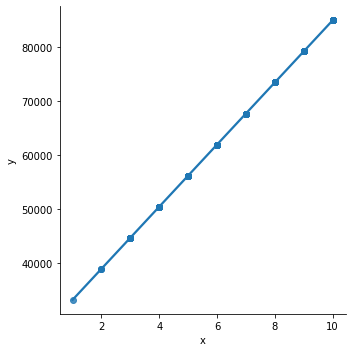

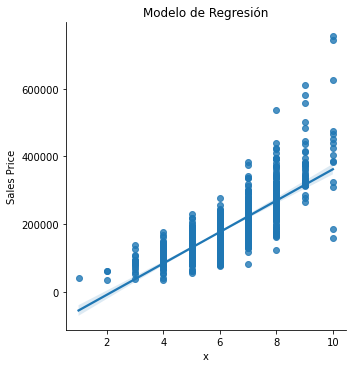

Modelo de Regresión-- > Iteración  19
b0: 27371.19722074074
b1: 5923.405641217692
--------------------------------


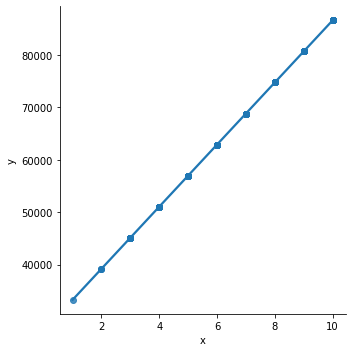

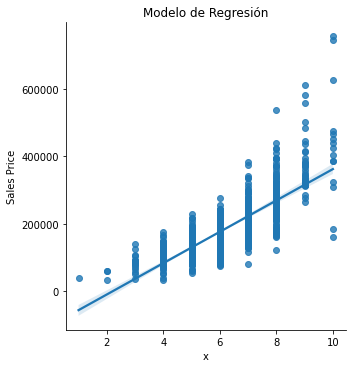

Modelo de Regresión-- > Iteración  21
b0: 27345.814573355743
b1: 6092.971281568691
--------------------------------


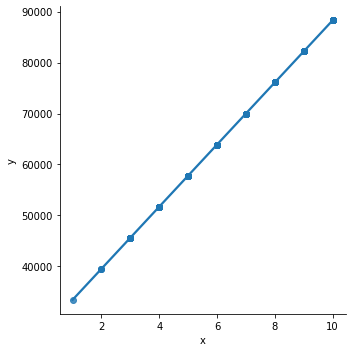

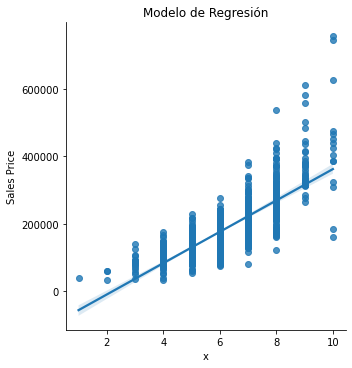

Modelo de Regresión-- > Iteración  23
b0: 27319.799948985175
b1: 6262.271013016664
--------------------------------


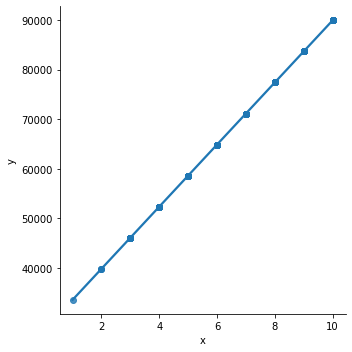

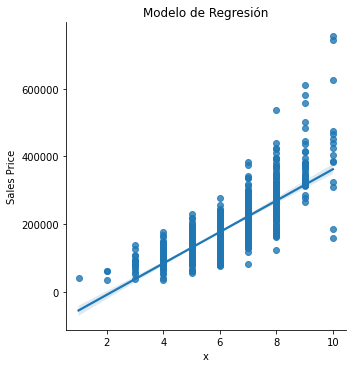

Modelo de Regresión-- > Iteración  25
b0: 27293.575432589103
b1: 6431.370790764212
--------------------------------


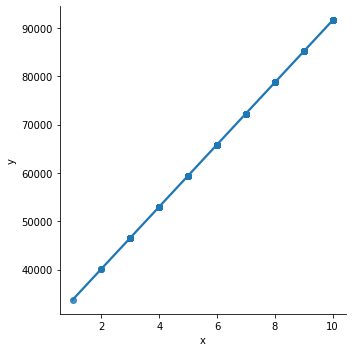

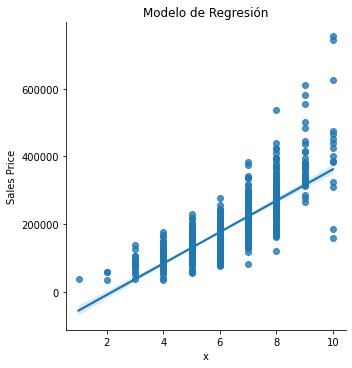

Modelo de Regresión-- > Iteración  27
b0: 27267.292098388032
b1: 6600.29432527566
--------------------------------


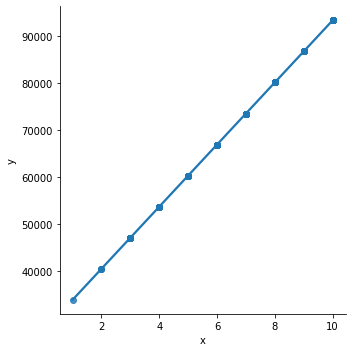

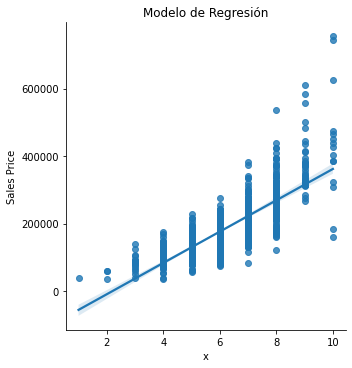

Modelo de Regresión-- > Iteración  29
b0: 27241.004009328935
b1: 6769.050204946993
--------------------------------


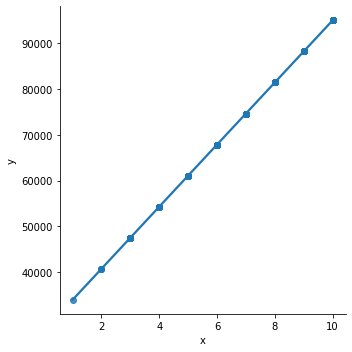

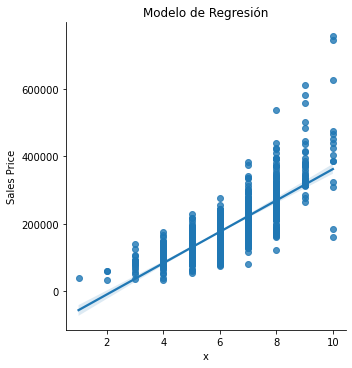

Modelo de Regresión-- > Iteración  31
b0: 27214.73050211673
b1: 6937.641604965333
--------------------------------


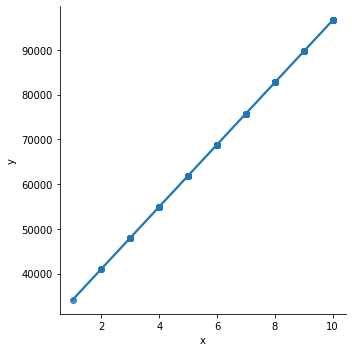

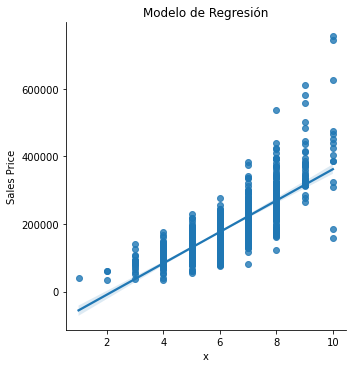

Modelo de Regresión-- > Iteración  33
b0: 27188.47848282944
b1: 7106.069762702562
--------------------------------


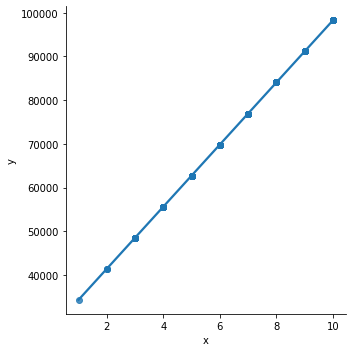

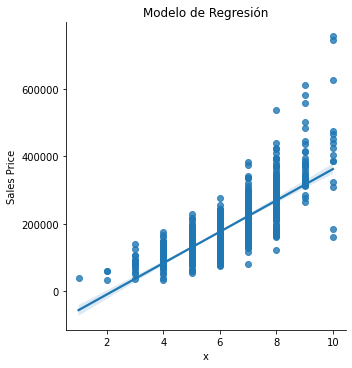

Modelo de Regresión-- > Iteración  35
b0: 27162.25040788001
b1: 7274.335221770968
--------------------------------


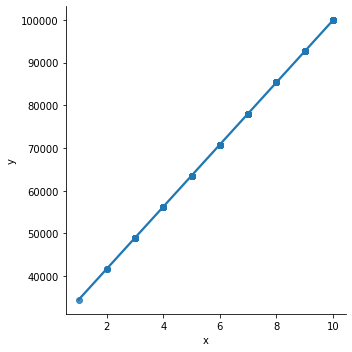

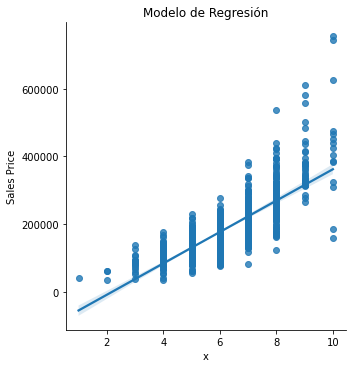

Modelo de Regresión-- > Iteración  37
b0: 27136.047140889732
b1: 7442.438277346799
--------------------------------


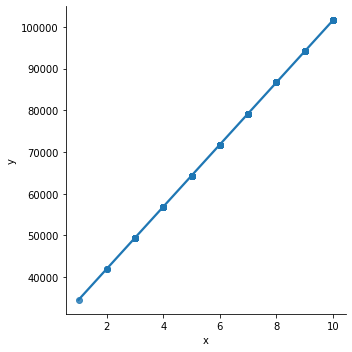

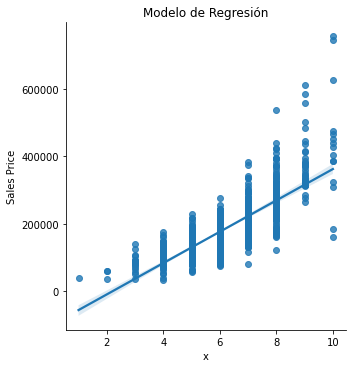

Modelo de Regresión-- > Iteración  39
b0: 27109.86897533767
b1: 7610.3791355788335
--------------------------------


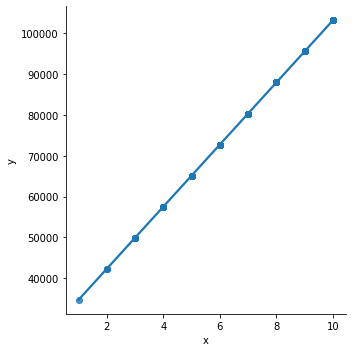

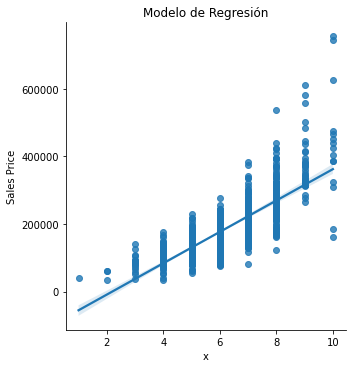

In [49]:
reg2.visualizar_modelo(n=2)

#Entrenando Modelos con SciKit Learn

###Sales Price vs Overall Quality Linear Model

En el siguiente código entrenamos el modelo para Overall -Quality vs Sale Price con el algoritmo de scikit learn.

In [50]:

from sklearn.linear_model import LinearRegression

X_train = np.array(data_train['Overall-Quality'])
X_train = np.reshape(X_train, (-1, 1))
y_train = np.array(data_train['Sale Price'])

model_scikit1 = LinearRegression()
model_scikit1.fit(X_train, y_train)

coeficiente = model_scikit1.coef_
intercepto = model_scikit1.intercept_

print("Coeficiente:", coeficiente)
print("Intercepto:", intercepto)


Coeficiente: [46393.19997925]
Intercepto: -101738.06453365248


###Sales Price vs First Floor square feet (1stFlrSF) linear Model

In [51]:
X_train = np.array(data_train['1stFlrSF'])
X_train = np.reshape(X_train, (-1, 1))
y_train = np.array(data_train['Sale Price'])

model_scikit2 = LinearRegression()
model_scikit2.fit(X_train, y_train)

coeficiente = model_scikit2.coef_
intercepto = model_scikit2.intercept_

print("Coeficiente:", coeficiente)
print("Intercepto:", intercepto)

Coeficiente: [123.38694175]
Intercepto: 38098.627324327506


#Predicción con los Modelos y Testing Data

###Función para predicción de Resultados con los 2 Modelos:

In [52]:
def prediccion_modelo_manual(x, b0, b1):
    return b1 * x + b0

def prediccion_modelo_scikit(x, modelo):
    return modelo.predict(x.reshape(-1, 1))

def prediccion(x, b0, b1, modelo):
    prediccion_manual = prediccion_modelo_manual(x, b0, b1)
    prediccion_scikit = prediccion_modelo_scikit(x, modelo)
    prediccion_combinada = (prediccion_manual + prediccion_scikit) / 2
    return prediccion_manual, prediccion_scikit, prediccion_combinada

### Predicción para Overall Quality

La variable X con la que validaremos los datos:

In [53]:
x_test_overall_quality = np.array(data_test['Overall-Quality'])

Obtenemos los valores de Betas calculados con el modelo manual para Overall Quality:

In [54]:
betas_finales_manual1.tail(1)

,bo,b1
39,27096.789337,7694.288796


In [55]:
b0 = betas_finales_manual1['bo'][39]   #El 39 es el indice del último registro.
b1 = betas_finales_manual1['b1'][39]   #El 39 es el indice dle ultimo registro.

Evaluamos la función para obtener los 3 modelos de predicción de datos. El manual, el de scikit learn, y el combinado:

In [56]:
prediccion_manual1, prediccion_scikit1, prediccion_combinada1 = prediccion(x_test_overall_quality, b0, b1, model_scikit1)

###Predicción para 1stFlrSF

La variable X con la que validaremos los datos:

In [57]:
x_test_1stFlrSF = np.array(data_test['1stFlrSF'])

Obtenemos los valores de Betas calculados con el modelo manual para 1sFlrSF:

In [58]:
betas_finales_manual2.tail(1)

,bo,b1
39,27096.789337,7694.288796


In [59]:
b0 = betas_finales_manual2['bo'][39]   #El 39 es el indice del último registro.
b1 = betas_finales_manual2['b1'][39]   #El 39 es el indice dle ultimo registro.

Evaluamos la función para obtener los 3 modelos de predicción de datos. El manual, el de scikit learn, y el combinado:

In [60]:
prediccion_manual2, prediccion_scikit2, prediccion_combinada2 = prediccion(x_test_1stFlrSF, b0, b1, model_scikit1)

#Calculo de Errores en la predicción y sus Gráficas 

###Error para Overall Quality

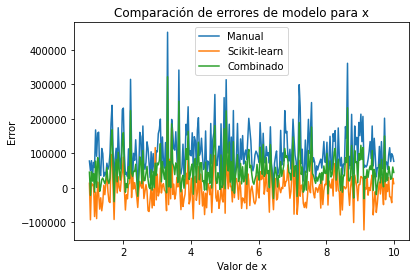

In [62]:
y_test_sales=np.array(data_test['Sale Price'])

# calculo el error de cada modelo en los datos de validación
error_manual = y_test_sales - prediccion_manual1
error_scikit = y_test_sales- prediccion_scikit1
error_combinado = y_test_sales - prediccion_combinada1

x_val = np.linspace(min(x_test_overall_quality), max(x_test_overall_quality), 297) #Verificar cuantos datos hay en el set de testing y colocar ese número.

# graficamos los errores de cada modelo
plt.plot(x_val, error_manual, label='Manual')
plt.plot(x_val, error_scikit, label='Scikit-learn')
plt.plot(x_val, error_combinado, label='Combinado')
plt.legend()
plt.xlabel('Valor de x')
plt.ylabel('Error')
plt.title('Comparación de errores de modelo para x')
plt.show()

Se concluye que el modelo de **Scikit Learn** produce menos error en la predicción de los datos, de acuerdo a la gráfica mostrada. 

###Error para 1st-FlrSF

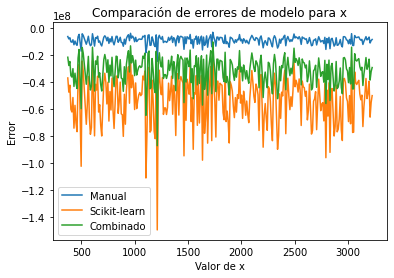

In [63]:
y_test_sales=np.array(data_test['Sale Price'])

# calculo el error de cada modelo en los datos de validación
error_manual = y_test_sales - prediccion_manual2
error_scikit = y_test_sales- prediccion_scikit2
error_combinado = y_test_sales - prediccion_combinada2

x_val = np.linspace(min(x_test_1stFlrSF), max(x_test_1stFlrSF), 297)  #Verificar cuantos datos hay en el set de testing y colocar ese número.

# graficamos los errores de cada modelo
plt.plot(x_val, error_manual, label='Manual')
plt.plot(x_val, error_scikit, label='Scikit-learn')
plt.plot(x_val, error_combinado, label='Combinado')
plt.legend()
plt.xlabel('Valor de x')
plt.ylabel('Error')
plt.title('Comparación de errores de modelo para x')
plt.show()

En este caso, los 3 son muy buenos modelos.  Podemos ver que El Modelo manual no produce tanto error, aunque no es tan significativo como para los otros modelos.

#Conclusiones

El modelo de regresión lineal utilizado en este proyecto fue el model por descenso del gradiente. Este permite entrenar un conjunto de datos y la pendiente y los interceptos de un recta, que más tarde pueden ser usados para predecir datos de acuerdo como se entrenó.  En el proyecto se contrastó este metodo con el modelo de scikit learn, que es una libreria especializada para machine Learning.  Los aprendizaje obtenidos en este proyecto fueron numerosos, desde utilizar herramientas tales como las librerias como numpy, pandas, matplotlib y seaborn hasta entender con mayor detalle la logica detrás de un algoritmo de entrenamiento de Machine Learning.